# Full Amphora Comparative Morphological Analysis Part 2

This code executes **full amphora comparative morphological analysis** on the point clouds for the following 31 amphoras from the Yassiada site:

- 83-2
- 84-3
- 84-10
- 86-75
- 86-85
- 86-92
- 86-93
- 86-95
- 86-99
- 86-100
- 86-107
- 86-110
- 86-113
- 86-117
- 86-120
- UN16
- W43
- W55
- Y7
- Y11
- Y14
- Y15
- Y22
- Y28
- Y32
- Y39
- Y45
- Y123
- Y126
- Y127
- Y128

Using Y114 as the reference amphora.

Full jar comparative morphological analysis:
- visualization of the average point-to-point distance between the two model point clouds across all amphoras of the dataset
- optionally save all point-to-point distances as a csv file to avoid repeating this computaiton

# I/O
**Inputs:**
 - comma-separated value (.csv) file for each reference and compared amphora model

**Outputs:**
 - csv file storing all point-to-point distances distance between each pare of compared amphoras
 - a visualization of the distribution of these average distances across the set of amphoras
 
# Description

This notebook is **Part 2** of the user interface for the analysis. Before running the notebook, the user assigns values to the variables in the cell (i.e. block of code) under the heading "User Inputs;" this is the only cell that the user should ever edit. The subsequent cells perform the cleaning and analysis of the point clouds.

Most of the code has been abstracted away from this notebook and consolidated in a separate utility file in order to leave this notebook user interface clean and uncluttered. I.e. the utility file is where I wrote the code which actually does the heavy lifting; this notebook uses that toolkit.

## Imports
Import modules and other required dependencies.
- **util** : the module written by me, containing amphora point cloud analysis methods
- **matplotlib** : a module that helps make nice plots

In [5]:
import sys
sys.path.insert(0,'../../')
import util
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## User Inputs
Define some information that the code needs to know. This cell is the only cell that the user should edit.

In [28]:
ref = 'Y114'
# compared = ['84-10', '86-85', '86-92', '86-93', '86-99', '86-107', '86-110', '86-117', '86-120', 'C', 'D', 'F', 'W43', 'W55', 'Y7', 'Y11', 'Y15', 'Y39', 'Y126', 'Y127', 'Y128']
compare = ['83-2',
          '84-3',
          '84-10',
          '86-75',
          '86-85',
          '86-92',
          '86-93',
          '86-95',
          '86-99',
          '86-100',
          '86-107',
          '86-110',
          '86-113',
          '86-117',
          '86-120',
          'UN16',
          'W43',
          'W55',
          'Y7',
          'Y11',
          'Y14',
          'Y15',
          'Y22',
          'Y28',
          'Y32',
          'Y39',
          'Y45',
          'Y123',
          'Y126',
          'Y127',
          'Y128']
path_to_csv = './clean_csv/'
save_distances = True      # whether or not to save csv files of nearest-neighbor distances between objects.
                           # Set True if these files do not yet exist, else False.

## Cloud-to-Cloud Distance Comparison
For each model, calculate the mean distance from each point in Object 1 to the nearest neighbor in Object 2.

In [29]:
average_distances = []
stdev_distances = []
for model in compare:
    
    print model # so the user can see which segment the code is working on
    
    ref_csv_path = path_to_csv + ref + '.csv'
    model_csv_path = path_to_csv + model + '.csv'
    dist_filename = ref + '_' + model + '_distances.csv'
    
    average_distance, stdev_distance = util.get_avg_cc_dist(ref_csv_path, model_csv_path, save_distances, dist_filename)
    
    average_distances.append(average_distance)
    stdev_distances.append(stdev_distance)

83-2
84-3
84-10
86-75
86-85
86-92
86-93
86-95
86-99
86-100
86-107
86-110
86-113
86-117
86-120
UN16
W43
W55
Y7
Y11
Y14
Y15
Y22
Y28
Y32
Y39
Y45
Y123
Y126
Y127
Y128


^ Each of these are status messages, which print while the program is running when the corresponding model is being compared with the reference.

# Morphological difference from Y114 across the dataset

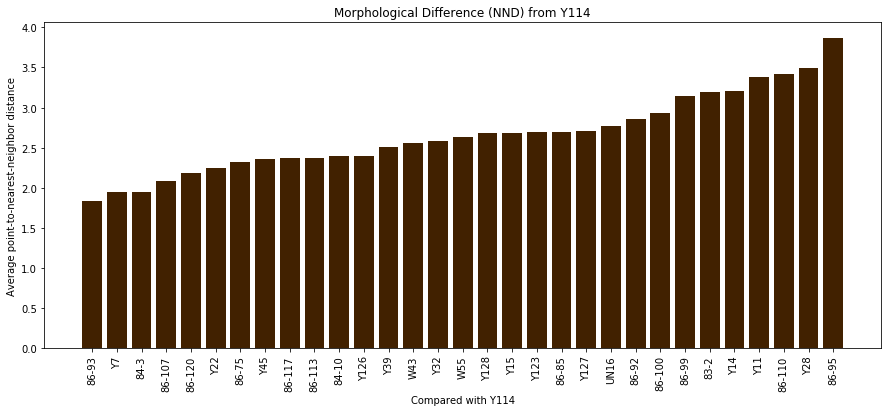

In [33]:
# order the compared amphoras by avg NND to ref amphora
compare_sorted = [x for _,x in sorted(zip(average_distances, compare))]
average_distances_sorted = sorted(average_distances)

fig, ax = plt.subplots(figsize = (15, 6))
x_pos = np.arange(len(compare_sorted))
ax.bar(x_pos, average_distances_sorted, color='#412100')
ax.set_xticks(x_pos)
ax.set_xticklabels(compare_sorted)
ax.set_xlabel('Compared with Y114')
ax.set_ylabel('Average point-to-nearest-neighbor distance')
ax.set_title('Morphological Difference (NND) from Y114')
plt.xticks(rotation='vertical')
plt.show()

** Import pertinent data physically measured. **

In [21]:
import pandas as pd
phys_data = pd.read_csv('phys_data.csv', index_col=0)
print phys_data

        max_diam  body_height                       group
tag                                                      
83-2        40.7         38.9  Spiral combed - main group
84-3        42.0         41.3  Spiral combed - main group
84-10       41.8         40.9  Spiral combed - main group
86-75       41.8         41.4  Spiral combed - main group
86-85       41.3         39.0  Spiral combed - main group
86-92       40.9         41.2  Spiral combed - main group
86-93       42.3         41.3  Spiral combed - main group
86-95       43.0         41.5  Spiral combed - main group
86-99       41.1         42.1  Spiral combed - main group
86-100      41.4         43.1  Spiral combed - main group
86-107      41.9         42.2  Spiral combed - main group
86-110      43.9         43.2  Spiral combed - main group
86-113      42.0         42.2  Spiral combed - main group
86-117      42.8         42.3  Spiral combed - main group
86-120      41.8         42.4  Spiral combed - main group
UN16        42

Printing physical measurement ranges for reference:

In [14]:
print 'range max diameter: ' + str(40.2) + ' -> ' + str(43.9) + ' cm'
print 'range body height:  ' + str(38.9) + ' -> ' + str(43.2) + ' cm'

range max diameter: 40.2 -> 43.9 cm
range body height:  38.9 -> 43.2 cm


# Morphological difference compared with other physical quantities across the dataset

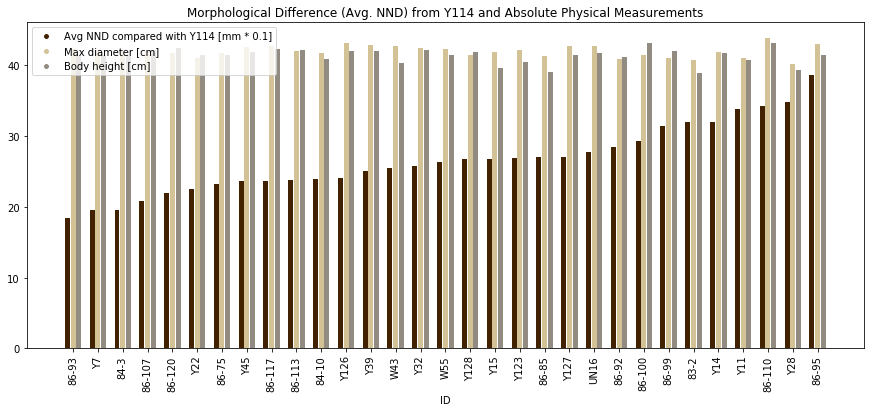

In [77]:
from matplotlib.lines import Line2D

phys_data_comp = phys_data.drop([ref])

max_diam = list(phys_data_comp['max_diam'])
body_height = list(phys_data_comp['body_height'])

max_diam_sorted = [x for _,x in sorted(zip(average_distances, max_diam))]
body_height_sorted = [x for _,x in sorted(zip(average_distances, body_height))]

fig, ax = plt.subplots(figsize=(15,6))
x_pos = np.arange(len(compare_sorted))

w = 0.2
s = 0.03

colors = ['#d2c295', '#928b81']

ax.bar(x_pos-w-s, [x*10 for x in average_distances_sorted],width=w,color='#412100',align='center')
ax.bar(x_pos, max_diam_sorted,width=w,color=colors[0],align='center')
ax.bar(x_pos+w+s, body_height_sorted,width=w,color=colors[1],align='center')

handle_list = [Line2D([0],[0], marker='o', color='w', markerfacecolor='#412100', label='Avg NND compared with Y114 [mm * 0.1]'),
               Line2D([0],[0], marker='o', color='w', markerfacecolor=colors[0], label='Max diameter [cm]'),
               Line2D([0],[0], marker='o', color='w', markerfacecolor=colors[1], label='Body height [cm]')]
plt.legend(handles=handle_list, loc='upper left')
plt.xlabel('ID')
ax.set_xticks(x_pos)
ax.set_xticklabels(compare_sorted)
ax.set_title('Morphological Difference (Avg. NND) from Y114 and Absolute Physical Measurements')
plt.xticks(rotation='vertical')
plt.show()

#### measurement difference =  abs(measurement - Y114 measurement)

In [24]:
row_Y114 = phys_data.loc['Y114']

max_diam_sorted_diff_with_Y114 = [abs(x-row_Y114.loc['max_diam']) for x in max_diam_sorted]
body_height_sorted_diff_with_Y114 = [abs(x-row_Y114.loc['body_height']) for x in body_height_sorted]

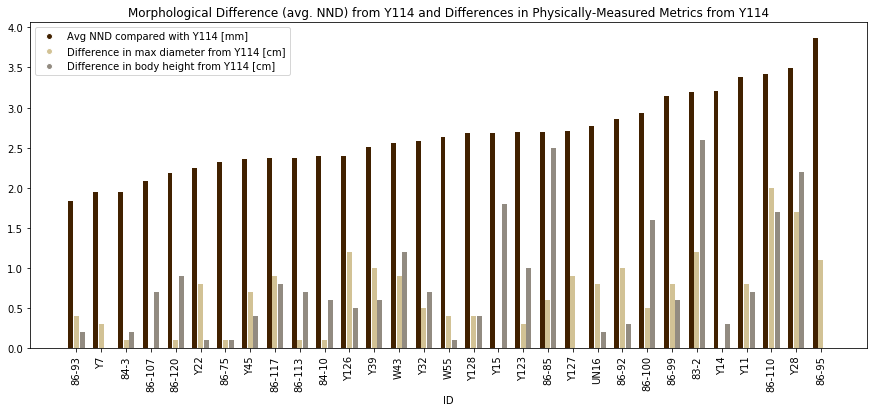

In [78]:
fig, ax = plt.subplots(figsize=(15,6))
x_pos = np.arange(len(compare_sorted))

w = 0.2
s = 0.03

colors = ['#d2c295', '#928b81']

ax.bar(x_pos-w-s, average_distances_sorted,width=w, color='#412100',align='center')
ax.bar(x_pos, max_diam_sorted_diff_with_Y114,width=w, color=colors[0],align='center')
ax.bar(x_pos+w+s, body_height_sorted_diff_with_Y114,width=w, color=colors[1],align='center')

handle_list = [Line2D([0],[0], marker='o', color='w', markerfacecolor='#412100', label='Avg NND compared with Y114 [mm]'),
               Line2D([0],[0], marker='o', color='w', markerfacecolor=colors[0], label='Difference in max diameter from Y114 [cm]'),
               Line2D([0],[0], marker='o', color='w', markerfacecolor=colors[1], label='Difference in body height from Y114 [cm]')]

plt.legend(handles=handle_list, loc='upper left')
plt.xlabel('ID')
ax.set_xticks(x_pos)
ax.set_xticklabels(compare_sorted)
ax.set_title('Morphological Difference (avg. NND) from Y114 and Differences in Physically-Measured Metrics from Y114')
plt.xticks(rotation='vertical')
plt.show()

# Characterizing the dataset as a whole

In [36]:
metrics_abs = [max_diam_sorted,
          body_height_sorted]

metrics_diff = [max_diam_sorted_diff_with_Y114,
          body_height_sorted_diff_with_Y114]

metric_names = ['max diam [cm]', 'body ht [cm]']

print 'Physical metrics, absolute\n\n\t\t%s\t\t%s\t\t%s\n' % ('mean', 'stdev', 'cv')
for metric, name in zip(metrics_abs, metric_names):
    print '%s\t%f\t%f\t%f' % (name, np.mean(metric), np.std(metric), np.mean(metric)/np.std(metric))

print '\nPhysical metrics, difference from %s\n\n\t\t%s\t\t%s\t\t%s\n' % (ref, 'mean', 'stdev', 'cv')
for metric, name in zip(metrics_diff, metric_names):
    print '%s\t%f\t%f\t%f' % (name, np.mean(metric), np.std(metric), np.mean(metric)/np.std(metric))
    
print '\nMorphological difference from Y114\n\n\t\t%s\t\t%s\t\t%s\n' % ('mean', 'stdev', 'cv')
name = 'NND [mm]'
metric = average_distances_sorted
print '%s\t%f\t%f\t%f' % (name, np.mean(metric), np.std(metric), np.mean(metric)/np.std(metric))


Physical metrics, absolute

		mean		stdev		cv

max diam [cm]	42.012903	0.795853	52.789782
body ht [cm]	41.387097	1.046882	39.533668

Physical metrics, difference from Y114

		mean		stdev		cv

max diam [cm]	0.635484	0.492229	1.291033
body ht [cm]	0.764516	0.724034	1.055912

Morphological difference from Y114

		mean		stdev		cv

NND [mm]	2.661336	0.480366	5.540226
